# ANN for MNIST



In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

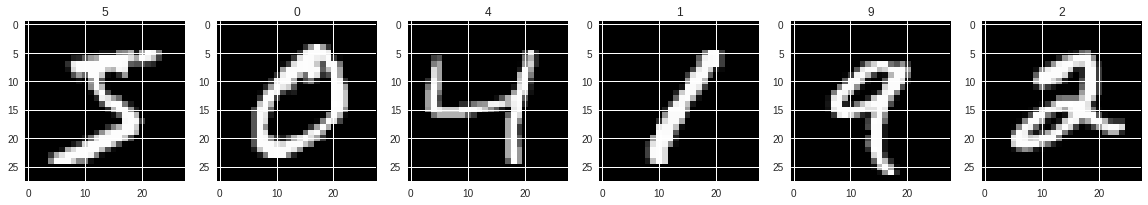

In [8]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
  ax = fig.add_subplot(1, 6, i + 1)
  ax.imshow(X_train[i] , cmap = 'gray')
  ax.set_title(str(y_train[i]))

In [0]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [10]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(392 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(100 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10 , activation = 'softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dropout_1 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               39300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)      

In [0]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'sgd' , metrics = ['accuracy'])

In [19]:
model.fit(X_train , y_train , validation_data= (X_test , y_test) , epochs= 10 , batch_size=32)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.6785 - acc: 0.8043 - val_loss: 0.3016 - val_acc: 0.9140
Epoch 2/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.3427 - acc: 0.8996 - val_loss: 0.2353 - val_acc: 0.9323
Epoch 3/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.2740 - acc: 0.9206 - val_loss: 0.1951 - val_acc: 0.9437
Epoch 4/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.2338 - acc: 0.9322 - val_loss: 0.1685 - val_acc: 0.9512
Epoch 5/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.2032 - acc: 0.9414 - val_loss: 0.1512 - val_acc: 0.9560
Epoch 6/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.1823 - acc: 0.9470 - val_loss: 0.1358 - val_acc: 0.9588
Epoch 7/10
60000/60000 [==============================] - 10s 159us/

In [20]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 96.8700%
